In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
car = pd.read_csv('car data.csv')

In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car.shape

(301, 9)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
print(car['Fuel_Type'].value_counts())
print(car['Seller_Type'].value_counts())
print(car['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
encoder = LabelEncoder()

In [18]:
for i in car[['Fuel_Type', 'Seller_Type', 'Transmission']]:
    car[i] = encoder.fit_transform(car[i])

In [19]:
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [20]:
x = car.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car['Selling_Price']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=2)

### Linear Regression Model

In [22]:
linreg = LinearRegression()

In [23]:
linreg.fit(x_train, y_train)

LinearRegression()

In [24]:
train_pred = linreg.predict(x_train)

In [25]:
error_score = metrics.r2_score(y_train, train_pred)
print('R Squared Error : ', error_score)

R Squared Error :  0.87994516604937


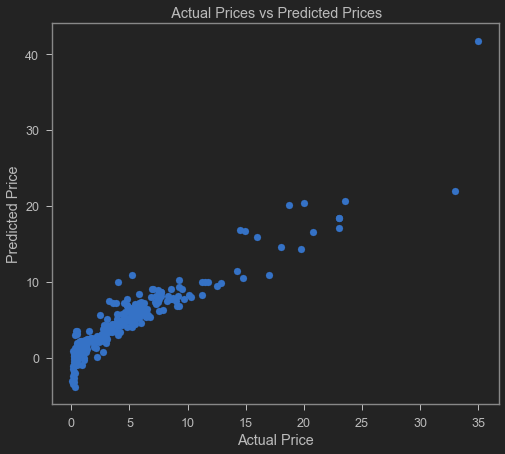

In [26]:
plt.scatter(y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
test_pred = linreg.predict(x_test)

In [28]:
error_test = metrics.r2_score(y_test, test_pred)
print('R Squared Error : ', error_test)

R Squared Error :  0.8365766715025347


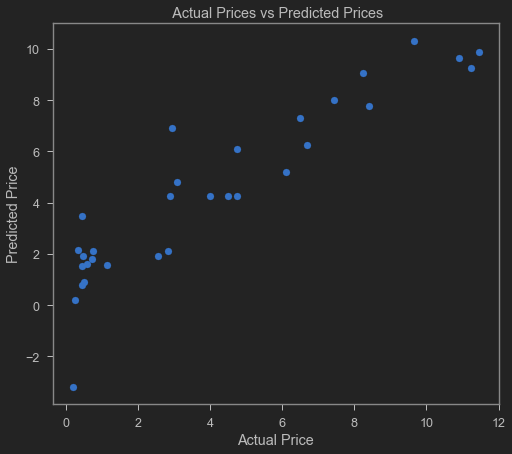

In [29]:
plt.scatter(y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Lasso Regression Model

In [30]:
lassreg = Lasso()

In [31]:
lassreg.fit(x_train, y_train)

Lasso()

In [32]:
train_pred = lassreg.predict(x_train)

In [33]:
lassreg_train_score = metrics.r2_score(y_train, train_pred)
print('R2 Error : ', lassreg_train_score)

R2 Error :  0.8427856123435794


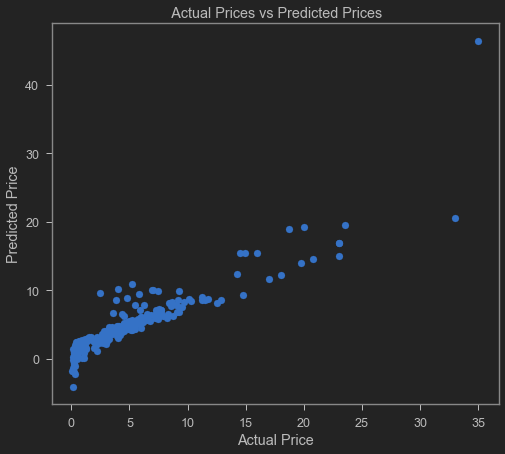

In [37]:
plt.scatter(y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [35]:
test_pred = lassreg.predict(x_test)

In [36]:
lassreg_test_score = metrics.r2_score(y_test, test_pred)
print('R2 Error : ', lassreg_test_score)

R2 Error :  0.8709167941173195


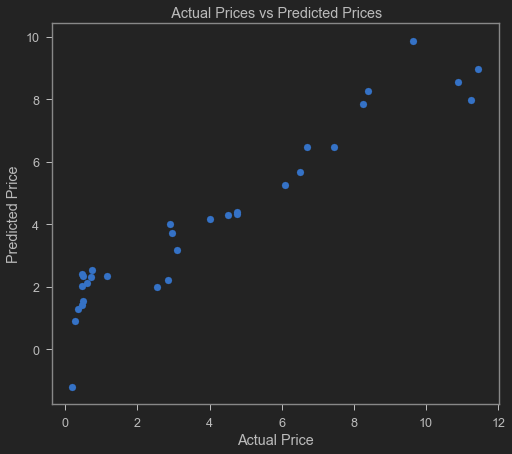

In [38]:
plt.scatter(y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()